# Introduction
Problem: Image Colorization.\
Github link: .\
Dataset link: https://www.kaggle.com/datasets/shravankumar9892/image-colorization?resource=download .\

Model:

Summary:  

What is in this notebook:

Tutorial to recreate: 
- Download the dataset from the link and put it in folder "/palette/zip_files" on Google Drive
- Clone the code

## DEFINE 

In [1]:
# LIBRARY import
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
from google.colab import drive

In [2]:
# DEFINE SOME PATH
file_name = "grayscale.npy"
DRIVE_PATH = "/drive"
PALETTE_PATH = "/drive/MyDrive/Palette/simple-image-application/palette"

COLOR_PATH = PALETTE_PATH + "/color"
GRAYSACLE_PATH = PALETTE_PATH + "/grayscale"
DATASET_PATH = "/zip_files"

In [3]:
# Mount drive
drive.mount(DRIVE_PATH, force_remount=True)

Mounted at /drive


In [4]:
%cd ../
%cd {PALETTE_PATH}
%ls

/
/drive/MyDrive/Palette/simple-image-application/palette
color/    grayscale/  Palette.ipynb  setup.py  zip_files/
conf.yml  main.py     README.md      src/


## DEMO READ IMAGE

In [5]:
def view_npy_image(npy_file, cmap='gray'):
    img_array = np.load(npy_file)
    plt.imshow(img_array, cmap=cmap)

In [73]:
# READ AN IMAGE FOR SAMPLE
file_path = os.path.join(PALETTE_PATH, 'grayscale', "train.npy")
data = np.load(file_path)

In [74]:
file_color_data = os.path.join(PALETTE_PATH, 'color', "train.npy")
color_data = np.load(file_color_data)
color_data.shape

(10000, 224, 224, 2)

In [62]:
test_data = os.path.join(PALETTE_PATH, 'grayscale', "resized_train.npy")
test_data = np.load(test_data)
test_data.shape

(2000, 64, 64)

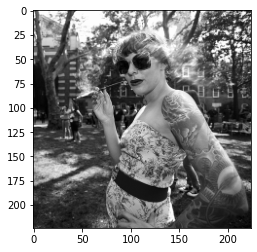

In [65]:
plt.imshow(data[0], cmap="gray")

In [108]:
# Downsize the train.npy file to reduce workload
resize_len = 200
resize_shape = 32
data = data[:resize_len]
color_data = color_data[:resize_len]

In [24]:
data.shape

(2000, 224, 224)

In [25]:
color_data.shape

(2000, 224, 224, 2)

In [33]:
data[0].dtype

dtype('uint8')

In [34]:
new_data[0].dtype

dtype('float64')

In [109]:
import cv2
from skimage.transform import resize
import copy
new_data = []
for index in range(resize_len):
    temp = resize(data[index], (resize_shape, resize_shape))
    rescale_temp = temp * 255
    new_data.append(rescale_temp.astype(np.uint8))
    
new_data = np.array(new_data)
print(new_data[0].dtype)
new_data.shape

uint8


(200, 32, 32)

In [81]:
new_data[0].dtype

dtype('float64')

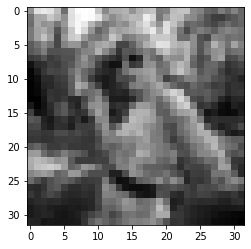

In [110]:
plt.imshow(new_data[0], cmap="gray")

In [111]:
color_new_data = []
for index in range(resize_len):
    temp = resize(color_data[index], (resize_shape, resize_shape, 2))
    rescale_temp = temp * 255
    color_new_data.append(rescale_temp.astype(np.uint8))
    
color_new_data = np.array(color_new_data)
print(color_new_data[0].dtype)
color_new_data.shape

uint8


(200, 32, 32, 2)

In [115]:
np.save('./color/resized_train.npy', color_new_data)
#np.save('./color/resized_train.npy', color_data)

In [116]:
np.save('./grayscale/resized_train.npy', new_data)
#np.save('./grayscale/resized_train.npy', data)

In [117]:
# Run the main python script to train model
!python main.py --config conf.yml

Config loaded
tcmalloc: large alloc 1254400000 bytes == 0x8c09c000 @  0x7fcd142011e7 0x7fcd11ad20ce 0x7fcd11b29e57 0x7fcd11b2aa6f 0x7fcd11bd0c5d 0x593835 0x548c51 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x548ae9 0x51566f 0x549e0e 0x4bcb19 0x532b86 0x594a96 0x515600 0x4bc98a 0x532b86 0x594a96 0x515600 0x593dd7 0x5118f8 0x593dd7 0x5118f8 0x549576 0x604173
Starting Training
Iteration 0 / 1000000:   0% 0/200 [00:00<?, ?it/s]^C


In [118]:
!git config --global user.email "19520208@gm.uit.edu.vn"
!git config --global user.name "hpn-nina"

In [15]:
!git add .
!git commit -m "Temp modified"

^C

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@04b2983a6c03.(none)')
